# Bell's inequality

How can a measurement of one particle's spin affects another, even if they are far away from each other? Is it because the measurements of the two spins are predetermined - are we missing some hidden information given by a variable hidden from quantum mechanics? 

In this exercise we will perform a famous Bell experiment with two entangled spin $1/2$ particles. The results tells us whether there are variables hidden from quantum mechanics or not. 

**Learning goal:** to understand better the foundation of quantum mechanics and entanglement. 

**Exercise 1 (warm-up):** what are the possible outcomes when we measure the $z$-component of the spin on a single spin 1/2 particle in the state
\begin{equation}
\frac{1}{\sqrt{2}}(|\uparrow \rangle - |\downarrow \rangle)
\end{equation}
?  


**Background:** In 1964, John Stewart Bell proposed the famous <b>Bell's inequality</b>, showing that **any theory of hidden variables is incompatible with results of quantum experiments**. 


**The setup:** We consider a spin 0 particle (a $\pi^0$) decaying into two spin 1/2 particles (two electrons) in the state

\begin{equation}
|\psi_-\rangle = \frac{1}{\sqrt{2}}\big(|\uparrow\downarrow\rangle-| \downarrow\uparrow\rangle\big) \ .
\end{equation}

For this to be possible the state of the two electrons must also be a spin 0 state (since spin is conserved).

**Exercise 2:** Check that the state of the two electrons is indeed a spin zero state. See e.g. section 4.4.3. of Griffiths and Schroeter.


We now measure the spin of one electron along a chosen axis $\mathbf{a}$ (it could be the $z$-axis, $S_z$) and the spin of the other electron along some other axis $\mathbf{b}$ (it could be, say, the $x$-axis $S_x$).

We repeat the experiment multiple times and record the results in units of $\hbar/2$ (hence we always get +1 or -1). We consider the product to the two results, f.ex. $1\cdot(-1)=-1$, and dub the **average product of the two results** $P(\mathbf{a},\mathbf{b})$. Next we change the orientation of the measurement devices and repeat this experiment with axies $\mathbf{a}$ and $\mathbf{c}$ (the average of the products will be $P(\mathbf{a},\mathbf{c})$), as well as with $\mathbf{b}$ and $\mathbf{c}$ (giving us $P(\mathbf{b},\mathbf{c})$). Bell proved exclusively from statistics that **any theory with hidden variables will predict the inequality**

$$|P(\mathbf{a},\mathbf{b})-P(\mathbf{a},\mathbf{c})| \leq 1 + P (\mathbf{b},\mathbf{c})$$

This is <b>Bell's inequality</b>. We will perform the exact experiments described above, and verify using an *actual* quantum computer that the experimental result violates Bell's inequality!

**Exercise 3:** What does it imply if Bell's inequality is violated in experiments?

**Confused?** Chapter 12 in Griffiths and Schroeter gives a more elaborate explanation. 

We start by importing the necessary packages for these experiments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/tmp/ipykernel_117/4023411004.py:12: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


**Our-setup:** We will choose $\mathbf{a}$, $\mathbf{b}$ and $\mathbf{c}$ all to be in the same plane. Hence we can define their orientation from their angle, $\theta_i$, with the $z$-axis. Let's choose $\mathbf{a}=\mathbf{z}$ be fixed, after all it is only the relative angles between the different measurement devices that matters. In other words we have chosen $\theta_A = 0$. 

For our experiments we choose the angles between the vectors $\mathbf{a}$, $\mathbf{b}$ and $\mathbf{c}$ to be 

In [2]:
thetaA = 0.0
thetaB = np.pi/2
thetaC = np.pi/4

Feel free to change angles as you please, but be beware that **not all choises of angles between the vectors will lead to experiments that violate Bell's inequality**. 

To see this: 

**Exercise 4:** Show that for $\mathbf{b} = \mathbf{c}$ Bell's inequality is nessesarely satisfied. 

We now set up the experiment for measuring $P(\mathbf{a},\mathbf{b})$.

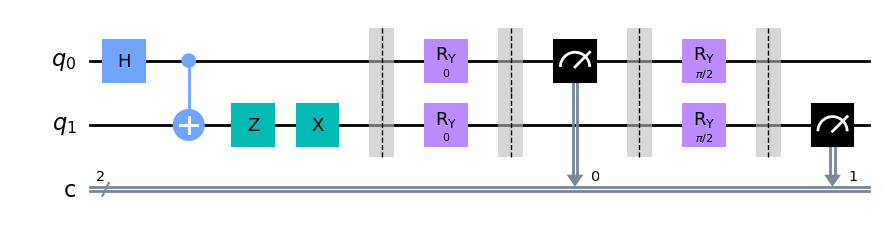

In [3]:
circAB = QuantumCircuit(2,2)
circAB.h(0)
circAB.cx(0,1)
circAB.z(1)
circAB.x(1)
circAB.barrier()
theta1 = thetaA
circAB.ry(theta1,0)
circAB.ry(theta1,1)
circAB.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circAB.measure(0,0)
circAB.barrier() 
theta2 = thetaB-thetaA 
circAB.ry(theta2,0)
circAB.ry(theta2,1)
circAB.barrier() 
circAB.measure(1,1)
circAB.draw()

**Don't miss:**  We rotate both $q_0$ and $q_1$ and not just one of them.

The code below sends this circuit to an actual IBM-Q Quantum Computer, and runs it 1024 times - there might be others using the quantum computers, so you might have to wait in line to get access. 

The variable 'sim' can be togled True or False. If you want to run a simulation of the code on an ordinary computer choose 'sim = True' and to run the experiment on an actual quantum computer set 'sim = False'.

In [4]:
sim = False #Set this to False if you want to run on an actual quantum computer

In [ ]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = 1024
    resultAB = simulator.run(circAB, shots=Nmeasure).result()
    device_countsAB = resultAB.get_counts()
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circAB, backend, optimization_level=3)
    qobj = assemble(transpiled_circ, shots=shots)
    jobAB = backend.run(qobj)
    job_monitor(jobAB, interval=2)
    device_countsAB = jobAB.result().get_counts()

device_countsAB[r"$1_1, 1_0$"] = device_countsAB.pop("11")
device_countsAB[r"$1_1, -1_0$"] = device_countsAB.pop("10")
device_countsAB[r"$-1_1, 1_0$"] = device_countsAB.pop("01")
device_countsAB[r"$-1_1, -1_0$"] = device_countsAB.pop("00")

ibmqfactory.load_account:WARNING:2023-03-22 12:28:11,779: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibm_oslo


/tmp/ipykernel_117/2079853415.py:21: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  jobAB = backend.run(qobj)


Job Status: job is queued (118)   

In [ ]:
plot_histogram(device_countsAB)

In [ ]:
device_countsAB

**How to read the results:** The measurement, say $-1_1, 1_0$, implies that we measured $1$ (ie. $\hbar/2$) for the spin of particle 0 along $\mathbf{a}$, while we measrued $-1$ (ie. $-\hbar/2$) for the spin of particle 1 along $\mathbf{b}$. Hence $P(\mathbf{a},\mathbf{b}) = (-1)\cdot1= -1$ for such a measurement. We find the average value of $P(\mathbf{a},\mathbf{b})$ by taking a weighted average over many repeated experiments. 

**Exercise 5:** Determine the average value $P(\mathbf{a},\mathbf{b})$ of the product from the experiment above. Compare to the prediction from qauntum mechanics $P(\mathbf{a},\mathbf{b}) = -\mathbf{a}\cdot \mathbf{b} = -\cos(\theta_A - \theta_B)$. (See eg. problem 4.59 in Griffiths and Schroeter.)

We now repeat the exact same steps in order to get the experimental value for $P(\mathbf{b},\mathbf{c})$.

In [ ]:
circCB = QuantumCircuit(2,2)
circCB.h(0)
circCB.cx(0,1)
circCB.z(1)
circCB.x(1)
circCB.barrier()
theta1 = thetaC
circCB.ry(theta1,0)
circCB.ry(theta1,1)
circCB.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circCB.measure(0,0)
circCB.barrier() 
theta2 = thetaB-thetaC
circCB.ry(theta2,0)
circCB.ry(theta2,1)
circCB.barrier() 
circCB.measure(1,1)
circCB.draw()

In [ ]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = 1024
    resultCB = simulator.run(circCB, shots=Nmeasure).result()
    device_countsCB = resultCB.get_counts()
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circCB, backend, optimization_level=3)
    qobj = assemble(transpiled_circ, shots=shots)
    jobCB = backend.run(qobj)
    job_monitor(jobCB, interval=2)
    device_countsCB = jobCB.result().get_counts()
    
device_countsCB[r"$1_1, 1_0$"] = device_countsCB.pop("11")
device_countsCB[r"$1_1, -1_0$"] = device_countsCB.pop("10")
device_countsCB[r"$-1_1, 1_0$"] = device_countsCB.pop("01")
device_countsCB[r"$-1_1, -1_0$"] = device_countsCB.pop("00")

In [ ]:
plot_histogram(device_countsCB)

In [ ]:
device_countsCB

**Exercise 6:** Compute our experimental value for $P(\mathbf{b},\mathbf{c})$ from these results. Check that our experimental result is compatible with the prediction from quantum mechanics (see Exercise 5).

Finally let's determine the experimental value for $P(\mathbf{a},\mathbf{c})$!

In [ ]:
circAC = QuantumCircuit(2,2)
circAC.h(0)
circAC.cx(0,1)
circAC.z(1)
circAC.x(1)
circAC.barrier()
theta1 = thetaA
circAC.ry(theta1,0)
circAC.ry(theta1,1)
circAC.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circAC.measure(0,0)
circAC.barrier() 
theta2 = thetaC-thetaA
circAC.ry(theta2,0)
circAC.ry(theta2,1)
circAC.barrier() 
circAC.measure(1,1)
circAC.draw()

In [ ]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = 1024
    resultAC = simulator.run(circAC, shots=Nmeasure).result()
    device_countsAC = resultAC.get_counts()
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circAC, backend, optimization_level=3)
    qobj = assemble(transpiled_circ, shots=shots)
    jobAC = backend.run(qobj)
    job_monitor(jobAC, interval=2)
    device_countsAC = jobAC.result().get_counts()
    
device_countsAC[r"$1_1, 1_0$"] = device_countsAC.pop("11")
device_countsAC[r"$1_1, -1_0$"] = device_countsAC.pop("10")
device_countsAC[r"$-1_1, 1_0$"] = device_countsAC.pop("01")
device_countsAC[r"$-1_1, -1_0$"] = device_countsAC.pop("00")

In [ ]:
plot_histogram(device_countsAC)

In [ ]:
device_countsAC

**Exercise 7:** Compute $P(\mathbf{a},\mathbf{c})$ from these results.

**Exercise 8:** Plug your results from Exercise 5-7 into Bell's inequality and check if it is violated.  

You can compare your results to the ones determined by the code below.

In [ ]:
def product_av(experiment):
    prod = experiment['$1_1, 1_0$'] + experiment['$-1_1, -1_0$'] - experiment['$-1_1, 1_0$'] - experiment['$1_1, -1_0$']
    if sim:
        return prod/Nmeasure
    else:
        return prod/shots

In [ ]:
print("Experimental results for Bell inequality: ",np.abs(product_av(device_countsAB)-product_av(device_countsAC)),"<",1+product_av(device_countsCB))

**Truly remakable!** We have verified through a real quantum experiment that Bell's inequality is violated - as a consequence, we have shown that the results of quantum experiments are incompatible with any theory of hidden variables. 

**Is Bell's inequality violated for all angles?** The plot below shows which angles between $\mathbf{a}$ and $\mathbf{c}$ violate Bell's inequality, assuming that $\mathbf{a}$ and $\mathbf{b}$ are orthogonal and all vectors are coplanar.

In [ ]:
N = 1000

thetaB = np.pi/2
thetaC_arr = np.linspace(-1,1,N)*np.pi

shade_top = 2*np.ones(N)
shade_bottom = -0.5*shade_top

lhs = np.abs(-np.cos(-1*thetaB) + np.cos(-1*thetaC_arr))
rhs = 1 - np.cos(thetaB - thetaC_arr)

violation = lhs > rhs

plt.figure(facecolor = 'white')
plt.plot(thetaC_arr, lhs, label = r"|P(a,b) - P(b,c)|")
plt.plot(thetaC_arr, rhs, label = "1 + P(b,c)")
plt.xlabel("thetaC [rad]")
plt.legend(loc = 'lower left')
plt.fill_between(thetaC_arr[violation],shade_top[violation], y2=shade_bottom[violation], alpha=0.3, color = 'green')
plt.text(0.05,-0.5,"Violation region", size = 9)
plt.title("Bell's inequality")
plt.savefig("Bell.png")

Feel free to change the angles at the top of the exercises to test if this is true! 
